# Historical Validation

Using CERF allocation, people affected and testing out Scenarios 2 and 3.

In [135]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [136]:
import geopandas as gpd
import pandas as pd
from pathlib import Path
from shapely.geometry import LineString
import os
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from src.datasources import codab, rsmc
from src import constants

In [137]:
df_rsmc = rsmc.load_historical_forecast_distances()
distance_cols = [x for x in df_rsmc.columns if "_distance_km" in x]
df_rsmc["any_distance_km"] = df_rsmc[distance_cols].min(axis=1)

In [138]:
cerf_emdat_df = pd.read_csv(
    Path(constants.AA_DATA_DIR)
    / "public/exploration/mdg/cerf_emdat_bngrc_data.csv"
)

In [139]:
cerf_emdat_df[cerf_emdat_df["Nom"] == "BATSIRAI"]

,Nom,Total Affected - EMDAT,Sinistres,CERF Allocations
56,BATSIRAI,112115.0,166671.0,4476918.0


In [140]:
adm0_path = (
    Path(constants.AA_DATA_DIR)
    / "public"
    / "raw"
    / "mdg"
    / "cod_ab"
    / "mdg_admbnda_adm0_BNGRC_OCHA_20181031.shp"
)
gdf_adm0 = gpd.read_file(adm0_path)

In [141]:
# Create buffer around gdf_adm0 with the given distance
# Reproject to a CRS that uses meters (e.g., EPSG:3857)
gdf_adm0_buffer = gdf_adm0.to_crs(epsg=constants.mdg_epsg)

# Apply the buffer of 100 km (100,000 meters)
gdf_adm0_buffer["geometry"] = gdf_adm0_buffer.geometry.buffer(
    100 * 1000
)  # 100 km = 100,000 meters

# Reproject back to the original CRS
gdf_adm0_buffer = gdf_adm0_buffer.to_crs(gdf_adm0.crs)

In [142]:
df_rsmc[df_rsmc["max_wind_kt"] >= 48]["name"].unique()

array(['0120102011', 'ALENGA', 'ANAIS', 'ADJALI', 'ANNABELLE', 'AVA',
       'ALICIA', 'ANA', 'ALVARO', 'ABELE', 'AMARA', 'BRANSBY', 'IRVING',
       'ALCIDE', 'BELNA', 'BATSIRAI', 'BELAL', 'BOLDWIN', 'BRUCE',
       'CORENTIN', 'BERGUITTA', 'BOUCHRA', 'AMBALI', 'BONGOYO', 'CANDICE',
       'BENILDE', 'CLAUDIA', 'BEJISA', 'KATE', 'CARLOS', 'KENANGA',
       'CALVINIA', 'CHALANE', 'DUMAKO', 'DARIAN', 'ANGGREK', 'BINGIZA',
       'CHANDA', 'DUMILE', 'BANSI', 'URIAH', 'DINEO', 'CEBILE', 'CILIDA',
       '0520202021', 'EMNATI', 'CHENESO', '0520232024', 'EMANG', 'COLIN',
       'CHEDZA', 'EMERAUDE', 'ENAWO', 'DUMAZILE', 'DIANE', 'DANILO',
       'FEZILE', 'DINGANI', 'DJOUNGOU', 'CHERONO', 'ETHEL', 'FELLENG',
       'DIAMONDRA', 'ELIAKIM', 'ELOISE', 'VERNON', 'FREDDY', 'ELEANOR',
       '0820102011', 'FUNSO', 'GINO', 'EUNICE', 'FANTALA', 'FAKIR',
       'FUNANI', 'ENALA', 'FILIPO', '0920102011', 'GIOVANNA', 'HARUNA',
       'FUNDI', 'FLAMBOYAN', 'GELENA', 'GABEKILE', 'GOMBE', 'GAMANE',
     

which storms are met for Scenario 2 and 3

In [143]:
# storms forecasted to be within 100 km of MDG
storms_within_aoi = df_rsmc[df_rsmc["any_distance_km"] <= 100]["name"].unique()
storms_onland = df_rsmc[df_rsmc["any_distance_km"] == 0]["name"].unique()

In [144]:
# Scenario 2
# Readiness
scenario2_storms_readiness = df_rsmc[
    (df_rsmc["name"].isin(storms_within_aoi))
    & (df_rsmc["MG_distance_km"] <= 100)
    & (df_rsmc["max_wind_kt"] >= 64)
    & (df_rsmc["lt_hour"].between(72, 120))
]["name"].unique()
scenario2_storms_action = df_rsmc[
    (df_rsmc["name"].isin(storms_within_aoi))
    & (df_rsmc["MG_distance_km"] <= 100)
    & (df_rsmc["max_wind_kt"] >= 64)
    & (df_rsmc["lt_hour"].between(0, 72))
]["name"].unique()

In [145]:
# Scenario 3
# Readiness
scenario3_storms_readiness = df_rsmc[
    (df_rsmc["name"].isin(storms_within_aoi))
    & (df_rsmc["MG_distance_km"] <= 100)
    & (df_rsmc["max_wind_kt"] >= 90)
    & (df_rsmc["lt_hour"].between(72, 120))
]["name"].unique()
scenario3_storms_action = df_rsmc[
    (df_rsmc["name"].isin(storms_within_aoi))
    & (df_rsmc["MG_distance_km"] <= 100)
    & (df_rsmc["max_wind_kt"] >= 90)
    & (df_rsmc["lt_hour"].between(0, 72))
]["name"].unique()

In [146]:
# Scenario 2.5
scenario2_point_5_storms_readiness = df_rsmc[
    (
        (df_rsmc["name"].isin(storms_within_aoi))
        & (df_rsmc["MG_distance_km"] <= 100)
        & (df_rsmc["max_wind_kt"] >= 90)
        & (df_rsmc["lt_hour"].between(72, 120))
    )
    | (
        (df_rsmc["name"].isin(storms_onland))
        & (df_rsmc["MG_distance_km"] == 0)
        & (df_rsmc["max_wind_kt"] >= 64)
        & (df_rsmc["lt_hour"].between(72, 120))
    )
]["name"].unique()
scenario2_point_5_storms_action = df_rsmc[
    (
        (df_rsmc["name"].isin(storms_within_aoi))
        & (df_rsmc["MG_distance_km"] <= 100)
        & (df_rsmc["max_wind_kt"] >= 90)
        & (df_rsmc["lt_hour"].between(0, 72))
    )
    | (
        (df_rsmc["name"].isin(storms_onland))
        & (df_rsmc["MG_distance_km"] == 0)
        & (df_rsmc["max_wind_kt"] >= 64)
        & (df_rsmc["lt_hour"].between(0, 72))
    )
]["name"].unique()

In [147]:
cerf_emdat_df.columns

Index(['Nom', 'Total Affected - EMDAT', 'Sinistres', 'CERF Allocations'], dtype='object')

In [148]:
df_rsmc.columns

Index(['valid_time', 'lt_hour', 'latitude', 'longitude', 'max_wind_kt',
       'season', 'name', 'numberseason', 'issue_time', 'MG_distance_km',
       'any_distance_km'],
      dtype='object')

In [149]:
# adding year and season to output
cerf_emdat_df = cerf_emdat_df.merge(
    df_rsmc[["name", "season"]].drop_duplicates(),
    left_on="Nom",
    right_on="name",
    how="left",
)

In [150]:
cerf_emdat_df = cerf_emdat_df[cerf_emdat_df["name"].isin(storms_within_aoi)]

In [151]:
cerf_emdat_df["Scenario 2 - Readiness"] = [
    storm in scenario2_storms_readiness for storm in cerf_emdat_df["name"]
]
cerf_emdat_df["Scenario 2 - Action"] = [
    storm in scenario2_storms_action for storm in cerf_emdat_df["name"]
]
cerf_emdat_df["Scenario 2.5 - Readiness"] = [
    storm in scenario2_point_5_storms_readiness
    for storm in cerf_emdat_df["name"]
]
cerf_emdat_df["Scenario 2.5 - Action"] = [
    storm in scenario2_point_5_storms_action for storm in cerf_emdat_df["name"]
]
cerf_emdat_df["Scenario 3 - Readiness"] = [
    storm in scenario3_storms_readiness for storm in cerf_emdat_df["name"]
]
cerf_emdat_df["Scenario 3 - Action"] = [
    storm in scenario3_storms_action for storm in cerf_emdat_df["name"]
]
cerf_emdat_df["season"] = (
    cerf_emdat_df["season"].str[:4] + "-" + cerf_emdat_df["season"].str[4:]
)
df = cerf_emdat_df[
    [
        "name",
        "season",
        "Scenario 2 - Readiness",
        "Scenario 2 - Action",
        # "Scenario 2.5 - Readiness",
        # "Scenario 2.5 - Action",
        "Scenario 3 - Readiness",
        "Scenario 3 - Action",
        "Total Affected - EMDAT",
        "Sinistres",
        "CERF Allocations",
    ]
]

# Sort the DataFrame by 'Total Affected' in descending order
# Round values in 'Total Affected' and 'CERF Allocations' columns
df_sorted = df.sort_values(by="Total Affected - EMDAT", ascending=False)


# Define functions for highlighting and coloring bars
def highlight_true(val):
    color = "red" if val else ""
    return f"background-color: {color}"


def color_bar_affected(val):
    if isinstance(val, (int, float)) and not pd.isna(val):
        return f'background: linear-gradient(90deg, orange {val/df_sorted["Total Affected - EMDAT"].max()*100}%, transparent {val/df_sorted["Total Affected - EMDAT"].max()*100}%);'
    return ""


def color_bar_sinistres(val):
    if isinstance(val, (int, float)) and not pd.isna(val):
        return f'background: linear-gradient(90deg, #FFD700 {val/df_sorted["Sinistres"].max()*100}%, transparent {val/df_sorted["Sinistres"].max()*100}%);'
    return ""


def color_bar_cerf(val):
    if isinstance(val, (int, float)) and not pd.isna(val):
        return f'background: linear-gradient(90deg, green {val/df_sorted["CERF Allocations"].max()*100}%, transparent {val/df_sorted["CERF Allocations"].max()*100}%);'
    return ""


# Apply styling
styled_df = (
    df_sorted.style.map(
        highlight_true,
        subset=[
            "Scenario 2 - Readiness",
            "Scenario 2 - Action",
            # "Scenario 2.5 - Readiness",
            # "Scenario 2.5 - Action",
            "Scenario 3 - Readiness",
            "Scenario 3 - Action",
        ],
    )
    .map(color_bar_affected, subset=["Total Affected - EMDAT"])
    .map(color_bar_sinistres, subset=["Sinistres"])
    .map(color_bar_cerf, subset=["CERF Allocations"])
    .format(
        {
            "season": lambda x: (x if pd.notna(x) else ""),
            "Total Affected - EMDAT": lambda x: (
                f"{int(x):,}" if pd.notna(x) else ""
            ),  # Format with commas, no decimals, NaN as blank
            "Sinistres": lambda x: (
                f"{int(x):,}" if pd.notna(x) else ""
            ),  # Format with commas, no decimals, NaN as blank
            "CERF Allocations": lambda x: (
                f"{int(x):,}" if pd.notna(x) else ""
            ),  # Format with commas, no decimals, NaN as blank
        }
    )
    .set_table_styles(
        {"": [{"selector": "table", "props": "background-color: white;"}]}
    )
)

# Display the styled DataFrame
styled_df

,name,season,Scenario 2 - Readiness,Scenario 2 - Action,Scenario 3 - Readiness,Scenario 3 - Action,Total Affected - EMDAT,Sinistres,CERF Allocations
46,ENAWO,2016-2017,True,True,True,True,"434,253","437,443","4,999,601"
63,FREDDY,2022-2023,True,True,True,True,"299,000","189,352","7,033,283"
38,GIOVANNA,2011-2012,True,True,True,True,"250,284","247,014","1,999,893"
44,CHEDZA,2014-2015,False,False,False,False,"174,007",,
58,EMNATI,2021-2022,True,True,True,True,"169,000","172,178","1,470,268"
47,AVA,2017-2018,False,True,False,False,"161,318","161,328",
59,ANA,2021-2022,False,False,False,False,"131,555",,
34,BINGIZA,2010-2011,True,True,False,True,"115,215","267,099",
56,BATSIRAI,2021-2022,True,True,True,True,"112,115","166,671","4,476,918"
62,CHENESO,2022-2023,False,False,False,False,"90,870","90,519",


In [152]:
scenario3_storms_best_track = pd.read_csv(
    Path(
        constants.AA_DATA_DIR,
        "public",
        "exploration",
        "mdg",
        "scenario3_storms_mfr_best_track.csv",
    ),
    header=None,
)[0].tolist()
cerf_emdat_df["Scenario 3 - Best Track"] = cerf_emdat_df["name"].isin(
    scenario3_storms_best_track
)

In [153]:
df = cerf_emdat_df[
    [
        "name",
        "season",
        # "Scenario 2 - Readiness",
        # "Scenario 2 - Action",
        # "Scenario 2.5 - Readiness",
        # "Scenario 2.5 - Action",
        "Scenario 3 - Readiness",
        "Scenario 3 - Action",
        "Scenario 3 - Best Track",
        "Total Affected - EMDAT",
        "Sinistres",
        "CERF Allocations",
    ]
]

# Sort the DataFrame by 'Total Affected' in descending order
# Round values in 'Total Affected' and 'CERF Allocations' columns
df_sorted = df.sort_values(by="Total Affected - EMDAT", ascending=False)


# Define functions for highlighting and coloring bars
def highlight_true(val):
    color = "red" if val else ""
    return f"background-color: {color}"


def color_bar_affected(val):
    if isinstance(val, (int, float)) and not pd.isna(val):
        return f'background: linear-gradient(90deg, orange {val/df_sorted["Total Affected - EMDAT"].max()*100}%, transparent {val/df_sorted["Total Affected - EMDAT"].max()*100}%);'
    return ""


def color_bar_sinistres(val):
    if isinstance(val, (int, float)) and not pd.isna(val):
        return f'background: linear-gradient(90deg, #FFD700 {val/df_sorted["Sinistres"].max()*100}%, transparent {val/df_sorted["Sinistres"].max()*100}%);'
    return ""


def color_bar_cerf(val):
    if isinstance(val, (int, float)) and not pd.isna(val):
        return f'background: linear-gradient(90deg, green {val/df_sorted["CERF Allocations"].max()*100}%, transparent {val/df_sorted["CERF Allocations"].max()*100}%);'
    return ""


# Apply styling
styled_df = (
    df_sorted.style.map(
        highlight_true,
        subset=[
            # "Scenario 2 - Readiness",
            # "Scenario 2 - Action",
            # "Scenario 2.5 - Readiness",
            # "Scenario 2.5 - Action",
            "Scenario 3 - Readiness",
            "Scenario 3 - Action",
            "Scenario 3 - Best Track",
        ],
    )
    .map(color_bar_affected, subset=["Total Affected - EMDAT"])
    .map(color_bar_sinistres, subset=["Sinistres"])
    .map(color_bar_cerf, subset=["CERF Allocations"])
    .format(
        {
            "season": lambda x: (x if pd.notna(x) else ""),
            "Total Affected - EMDAT": lambda x: (
                f"{int(x):,}" if pd.notna(x) else ""
            ),  # Format with commas, no decimals, NaN as blank
            "Sinistres": lambda x: (
                f"{int(x):,}" if pd.notna(x) else ""
            ),  # Format with commas, no decimals, NaN as blank
            "CERF Allocations": lambda x: (
                f"{int(x):,}" if pd.notna(x) else ""
            ),  # Format with commas, no decimals, NaN as blank
        }
    )
    .set_table_styles(
        {"": [{"selector": "table", "props": "background-color: white;"}]}
    )
)

# Display the styled DataFrame
styled_df

,name,season,Scenario 3 - Readiness,Scenario 3 - Action,Scenario 3 - Best Track,Total Affected - EMDAT,Sinistres,CERF Allocations
46,ENAWO,2016-2017,True,True,True,"434,253","437,443","4,999,601"
63,FREDDY,2022-2023,True,True,False,"299,000","189,352","7,033,283"
38,GIOVANNA,2011-2012,True,True,False,"250,284","247,014","1,999,893"
44,CHEDZA,2014-2015,False,False,False,"174,007",,
58,EMNATI,2021-2022,True,True,False,"169,000","172,178","1,470,268"
47,AVA,2017-2018,False,False,False,"161,318","161,328",
59,ANA,2021-2022,False,False,False,"131,555",,
34,BINGIZA,2010-2011,False,True,False,"115,215","267,099",
56,BATSIRAI,2021-2022,True,True,True,"112,115","166,671","4,476,918"
62,CHENESO,2022-2023,False,False,False,"90,870","90,519",


In [163]:
# return period by trigger
yr_len = df_rsmc["season"].nunique()
df_readiness_true = (
    df[df["Scenario 3 - Readiness"]].groupby("name")["season"].nunique().sum()
)
print(
    f"The readiness trigger is met every {round(yr_len / df_readiness_true, 1)} years."
)

The readiness trigger is met every 2.0 years.


In [164]:
# return period by trigger
yr_len = 2024 - 2010 + 1
df_action_true = (
    df[df["Scenario 3 - Action"]].groupby("name")["season"].nunique().sum()
)
print(
    f"The action trigger is met every {round(yr_len / df_action_true, 1)} years."
)

The action trigger is met every 1.5 years.


In [165]:
# Convert valid_time to datetime
df_rsmc["valid_time"] = pd.to_datetime(df_rsmc["valid_time"])

# Find the closest pass to land for each storm
landfall_df = df_rsmc.loc[
    df_rsmc.groupby("name")["any_distance_km"].idxmin(),
    ["name", "valid_time"],
]
landfall_times = landfall_df.rename(columns={"valid_time": "landfall_time"})
df_landfall = df_rsmc.merge(landfall_times, on="name", how="left")
df_landfall["time_to_landfall"] = (
    df_landfall["landfall_time"] - df_landfall["issue_time"]
).dt.total_seconds() / 3600  # in hours

df_landfall

,valid_time,lt_hour,latitude,longitude,max_wind_kt,season,name,numberseason,issue_time,MG_distance_km,any_distance_km,landfall_time,time_to_landfall
0,2010-10-25 12:00:00+00:00,0.0,-10.000000,86.200000,25.00,20102011,0120102011,0120102011,2010-10-25 12:00:00+00:00,4348.956262,4348.956262,2010-11-01 06:00:00+00:00,162.0
1,2010-10-25 12:30:00+00:00,0.5,-10.018333,86.193333,25.00,20102011,0120102011,0120102011,2010-10-25 12:00:00+00:00,4347.470541,4347.470541,2010-11-01 06:00:00+00:00,162.0
2,2010-10-25 13:00:00+00:00,1.0,-10.036667,86.186667,25.00,20102011,0120102011,0120102011,2010-10-25 12:00:00+00:00,4345.985857,4345.985857,2010-11-01 06:00:00+00:00,162.0
3,2010-10-25 13:30:00+00:00,1.5,-10.055000,86.180000,25.00,20102011,0120102011,0120102011,2010-10-25 12:00:00+00:00,4344.502208,4344.502208,2010-11-01 06:00:00+00:00,162.0
4,2010-10-25 14:00:00+00:00,2.0,-10.073333,86.173333,25.00,20102011,0120102011,0120102011,2010-10-25 12:00:00+00:00,4343.019597,4343.019597,2010-11-01 06:00:00+00:00,162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
677530,2021-04-24 22:00:00+00:00,10.0,-6.620000,38.666667,21.00,20202021,JOBO,1620202021,2021-04-24 12:00:00+00:00,1233.956811,1233.956811,2021-04-20 21:00:00+00:00,-87.0
677531,2021-04-24 22:30:00+00:00,10.5,-6.592500,38.605000,20.75,20202021,JOBO,1620202021,2021-04-24 12:00:00+00:00,1240.090135,1240.090135,2021-04-20 21:00:00+00:00,-87.0
677532,2021-04-24 23:00:00+00:00,11.0,-6.565000,38.543333,20.50,20202021,JOBO,1620202021,2021-04-24 12:00:00+00:00,1246.236960,1246.236960,2021-04-20 21:00:00+00:00,-87.0
677533,2021-04-24 23:30:00+00:00,11.5,-6.537500,38.481667,20.25,20202021,JOBO,1620202021,2021-04-24 12:00:00+00:00,1252.399301,1252.399301,2021-04-20 21:00:00+00:00,-87.0


In [157]:
df_rsmc[
    (df_rsmc["MG_distance_km"] <= 100)
    & (df_rsmc["max_wind_kt"] >= 90)
    & (df_rsmc["lt_hour"].between(0, 72))
]["name"].unique()

array(['BELNA', 'BATSIRAI', 'BINGIZA', 'EMNATI', 'ENAWO', 'FREDDY',
       'GIOVANNA', 'HARUNA', 'GAMANE', 'HELLEN'], dtype=object)

In [158]:
# Find the first time readiness is reached (max_wind >= 90)
readiness_df = df_landfall[
    (df_landfall["name"].isin(storms_within_aoi))
    & (df_landfall["MG_distance_km"] <= 100)
    & (df_landfall["max_wind_kt"] >= 90)
    & (df_landfall["lt_hour"].between(72, 120))
]
readiness_df = readiness_df.groupby("name").first().reset_index()
readiness_df

,name,valid_time,lt_hour,latitude,longitude,max_wind_kt,season,numberseason,issue_time,MG_distance_km,any_distance_km,landfall_time,time_to_landfall
0,BATSIRAI,2022-02-05 12:00:00+00:00,120.0,-19.500000,49.880000,100.000000,20212022,0220212022,2022-01-31 12:00:00+00:00,95.801579,95.801579,2022-02-05 17:00:00+00:00,125.0
1,BELNA,2019-12-10 06:00:00+00:00,108.0,-18.140000,43.650000,90.000000,20192020,0220192020,2019-12-05 18:00:00+00:00,39.143965,39.143965,2019-12-08 11:30:00+00:00,65.5
2,EMNATI,2022-02-22 08:00:00+00:00,116.0,-19.000000,50.096667,95.000000,20212022,0520212022,2022-02-17 12:00:00+00:00,99.516537,99.516537,2022-02-22 15:30:00+00:00,123.5
3,ENAWO,2017-03-07 13:00:00+00:00,103.0,-16.570833,50.934167,97.916667,20162017,0620162017,2017-03-03 06:00:00+00:00,98.819582,98.819582,2017-03-07 07:00:00+00:00,97.0
4,FREDDY,2023-02-21 19:00:00+00:00,115.0,-19.804167,49.774167,94.166667,20222023,0720222023,2023-02-17 00:00:00+00:00,96.361238,96.361238,2023-02-21 23:30:00+00:00,119.5
5,GAMANE,2024-03-28 18:00:00+00:00,72.0,-14.810000,51.180000,95.000000,20232024,0920232024,2024-03-25 18:00:00+00:00,88.774436,88.774436,2024-03-27 15:30:00+00:00,45.5
6,GIOVANNA,2012-02-13 22:00:00+00:00,112.0,-16.873333,50.880000,100.000000,20112012,0920112012,2012-02-09 06:00:00+00:00,93.496967,93.496967,2012-02-14 05:00:00+00:00,119.0


In [159]:
# Find the first time action is reached (max_wind >= 90)
action_df = df_landfall[
    (df_landfall["name"].isin(storms_within_aoi))
    & (df_landfall["MG_distance_km"] <= 100)
    & (df_landfall["max_wind_kt"] >= 90)
    & (df_landfall["lt_hour"].between(0, 72))
]
action_df = action_df.groupby("name").first().reset_index()
action_df

,name,valid_time,lt_hour,latitude,longitude,max_wind_kt,season,numberseason,issue_time,MG_distance_km,any_distance_km,landfall_time,time_to_landfall
0,BATSIRAI,2022-02-05 01:30:00+00:00,67.5,-19.927500,49.723750,100.000000,20212022,0220212022,2022-02-02 06:00:00+00:00,94.329406,94.329406,2022-02-05 17:00:00+00:00,83.0
1,BELNA,2019-12-09 04:30:00+00:00,64.5,-14.891250,45.641250,95.000000,20192020,0220192020,2019-12-06 12:00:00+00:00,97.319973,97.319973,2019-12-08 11:30:00+00:00,47.5
2,BINGIZA,2011-02-14 00:00:00+00:00,36.0,-16.500000,50.500000,90.000000,20102011,0520102011,2011-02-12 12:00:00+00:00,56.127340,56.127340,2011-02-14 08:00:00+00:00,44.0
3,EMNATI,2022-02-22 02:30:00+00:00,68.5,-19.144167,50.009167,95.000000,20212022,0520212022,2022-02-19 06:00:00+00:00,96.022564,96.022564,2022-02-22 15:30:00+00:00,81.5
4,ENAWO,2017-03-07 00:00:00+00:00,60.0,-14.780000,50.810000,90.000000,20162017,0620162017,2017-03-04 12:00:00+00:00,56.571421,56.571421,2017-03-07 07:00:00+00:00,67.0
5,FREDDY,2023-02-21 14:30:00+00:00,68.5,-20.216667,49.708750,105.000000,20222023,0720222023,2023-02-18 18:00:00+00:00,98.640062,98.640062,2023-02-21 23:30:00+00:00,77.5
6,GAMANE,2024-03-27 12:30:00+00:00,48.5,-13.308750,50.943750,90.416667,20232024,0920232024,2024-03-25 12:00:00+00:00,99.980869,99.980869,2024-03-27 15:30:00+00:00,51.5
7,GIOVANNA,2012-02-13 15:00:00+00:00,57.0,-18.265000,50.340000,96.250000,20112012,0920112012,2012-02-11 06:00:00+00:00,97.268791,97.268791,2012-02-14 05:00:00+00:00,71.0
8,HARUNA,2013-02-21 16:00:00+00:00,22.0,-22.668667,42.328667,90.000000,20122013,0920122013,2013-02-20 18:00:00+00:00,98.939963,98.939963,2013-02-21 22:30:00+00:00,28.5
9,HELLEN,2014-03-30 21:30:00+00:00,9.5,-15.119167,44.897917,111.041667,20132014,1420132014,2014-03-30 12:00:00+00:00,97.582113,97.582113,2014-03-31 16:00:00+00:00,28.0


In [160]:
# Merge the readiness and action DataFrames into a single table based on 'name'
df_combined = pd.merge(
    readiness_df[["name", "lt_hour", "any_distance_km"]],
    action_df[["name", "lt_hour", "any_distance_km"]],
    on="name",
    how="outer",
    suffixes=("_readiness", "_action"),
)

df_combined

,name,lt_hour_readiness,any_distance_km_readiness,lt_hour_action,any_distance_km_action
0,BATSIRAI,120.0,95.801579,67.5,94.329406
1,BELNA,108.0,39.143965,64.5,97.319973
2,BINGIZA,NaN,NaN,36.0,56.127340
3,EMNATI,116.0,99.516537,68.5,96.022564
4,ENAWO,103.0,98.819582,60.0,56.571421
5,FREDDY,115.0,96.361238,68.5,98.640062
6,GAMANE,72.0,88.774436,48.5,99.980869
7,GIOVANNA,112.0,93.496967,57.0,97.268791
8,HARUNA,NaN,NaN,22.0,98.939963
9,HELLEN,NaN,NaN,9.5,97.582113


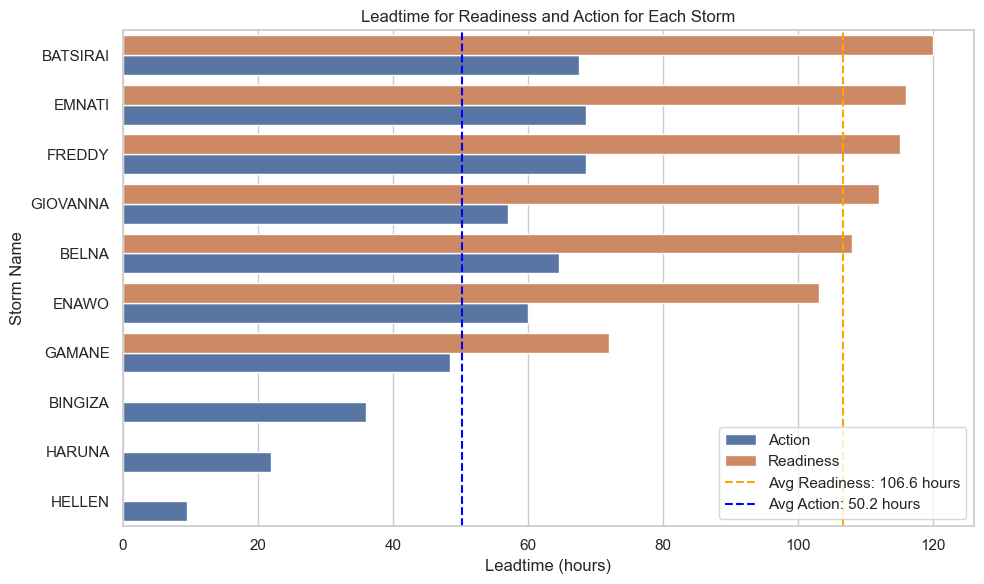

In [161]:
# Reshape the data into long format for grouped bars
df_melted = df_combined.melt(
    id_vars="name",
    value_vars=["lt_hour_readiness", "lt_hour_action"],
    var_name="trigger",
    value_name="time_to_trigger",
)

# Rename the 'trigger' column for clarity
df_melted["trigger"] = df_melted["trigger"].replace(
    {"lt_hour_readiness": "Readiness", "lt_hour_action": "Action"}
)

# Sort the dataframe by 'time_to_trigger' in ascending order to order storms
df_melted["name"] = pd.Categorical(
    df_melted["name"],
    categories=df_melted.groupby("name")["time_to_trigger"]
    .max()
    .sort_values(ascending=True)
    .index,
    ordered=True,
)

# Set plot style
sns.set(style="whitegrid")

# Create a grouped bar plot with storms on the y-axis
plt.figure(figsize=(10, 6))

# Set hue order so that Readiness is always on top of Action
sns.barplot(
    x="time_to_trigger",
    y="name",
    hue="trigger",
    data=df_melted,
    hue_order=["Action", "Readiness"],
)

# Add a vertical line for the average time to trigger for Readiness and Action
readiness_avg = df_melted[df_melted["trigger"] == "Readiness"][
    "time_to_trigger"
].mean()
action_avg = df_melted[df_melted["trigger"] == "Action"][
    "time_to_trigger"
].mean()

plt.axvline(
    x=readiness_avg,
    color="orange",
    linestyle="--",
    label=f"Avg Readiness: {readiness_avg:.1f} hours",
)
plt.axvline(
    x=action_avg,
    color="blue",
    linestyle="--",
    label=f"Avg Action: {action_avg:.1f} hours",
)

# Add labels and title
plt.xlabel("Leadtime (hours)")
plt.ylabel("Storm Name")
plt.title("Leadtime for Readiness and Action for Each Storm")

# Invert the y-axis to show storms in reverse order (optional)
plt.gca().invert_yaxis()

# Add a legend to show the average lines
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [162]:
df_rsmc[(df_rsmc["name"] == "GIOVANNA") & (df_rsmc["any_distance_km"] <= 100)]

,valid_time,lt_hour,latitude,longitude,max_wind_kt,season,name,numberseason,issue_time,MG_distance_km,any_distance_km
459903,2012-02-13 22:00:00+00:00,112.0,-16.873333,50.88000,100.000000,20112012,GIOVANNA,0920112012,2012-02-09 06:00:00+00:00,93.496967,93.496967
459904,2012-02-13 22:30:00+00:00,112.5,-16.876250,50.81125,100.000000,20112012,GIOVANNA,0920112012,2012-02-09 06:00:00+00:00,86.341177,86.341177
459905,2012-02-13 23:00:00+00:00,113.0,-16.879167,50.74250,100.000000,20112012,GIOVANNA,0920112012,2012-02-09 06:00:00+00:00,79.225375,79.225375
459906,2012-02-13 23:30:00+00:00,113.5,-16.882083,50.67375,100.000000,20112012,GIOVANNA,0920112012,2012-02-09 06:00:00+00:00,72.161093,72.161093
459907,2012-02-14 00:00:00+00:00,114.0,-16.885000,50.60500,100.000000,20112012,GIOVANNA,0920112012,2012-02-09 06:00:00+00:00,65.164765,65.164765
...,...,...,...,...,...,...,...,...,...,...,...
468493,2012-02-18 15:30:00+00:00,3.5,-26.395750,45.48750,58.541667,20112012,GIOVANNA,0920112012,2012-02-18 12:00:00+00:00,90.536391,90.536391
468494,2012-02-18 16:00:00+00:00,4.0,-26.388000,45.60000,58.333333,20112012,GIOVANNA,0920112012,2012-02-18 12:00:00+00:00,90.517180,90.517180
468495,2012-02-18 16:30:00+00:00,4.5,-26.380250,45.71250,58.125000,20112012,GIOVANNA,0920112012,2012-02-18 12:00:00+00:00,91.529698,91.529698
468496,2012-02-18 17:00:00+00:00,5.0,-26.372500,45.82500,57.916667,20112012,GIOVANNA,0920112012,2012-02-18 12:00:00+00:00,93.722875,93.722875
